In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [14]:
amegfi = pd.read_csv('Data/agg3_amegfi.txt')
tuftit = pd.read_csv('Data/agg3_tuftit.txt')
daejun = pd.read_csv('Data/agg3_daejun.txt')
mallar = pd.read_csv('Data/agg3_mallar.txt')

In [15]:
## Make a column to differentiate species. 
## The species are, in order, American Goldfinch, Tufted Titmouse, Dark Eyed Junco, Mallards.

amegfi['SPECIES'] = 0
tuftit['SPECIES'] = 1
daejun['SPECIES'] = 2
mallar['SPECIES'] = 3


def is_in(sth, iterable):
    for item in iterable:
        if sth == item:
            return True
    return False

## Calculate n where (year, month, and day) is in the n-th week since January 1st 2017

def ds_since_2017(year, month, day):
    if (year < 2017) or (month < 1) or (day < 1):
        print(year)
        print(month)
        print(day)
        print('Error: wrong date')
        return None
    leap_year = False
    if year%4 == 0:
        leap_year = True
    if month == 1:
        return day + 365 * (year - 2017) + (year >= 2020)
    else:
        if is_in(month, [4,6,9,11]):
            return ds_since_2017(year, month-1, day+30)
        elif month == 2:
            return ds_since_2017(year, month-1, day+28+leap_year)
        else:
            return ds_since_2017(year, month-1, day+31)



amegfi['ds'] = amegfi.apply(lambda x: ds_since_2017(x['YEAR'], x['MONTH'],x['DAY']), axis=1)
tuftit['ds'] = tuftit.apply(lambda x: ds_since_2017(x['YEAR'], x['MONTH'],x['DAY']), axis=1)
daejun['ds'] = daejun.apply(lambda x: ds_since_2017(x['YEAR'], x['MONTH'],x['DAY']), axis=1)
mallar['ds'] = mallar.apply(lambda x: ds_since_2017(x['YEAR'], x['MONTH'],x['DAY']), axis=1)



print(amegfi.head())
print(tuftit.head())
print(daejun.head())
print(mallar.head())

all_spec = pd.concat([amegfi,tuftit,daejun,mallar])
all_spec = all_spec.drop(['YEAR','MONTH','DAY'], axis = 1)

print(all_spec.head())

   YEAR  MONTH  DAY  LATITUDE  LONGITUDE  OBSERVATION COUNT  IBA CODE  \
0  2019      1    1      28.0      -97.0          14.333333  0.500000   
1  2019      1    1      28.0      -96.0           5.000000  0.000000   
2  2019      1    1      28.0      -83.0           4.100000  0.050000   
3  2019      1    1      28.0      -82.0           5.833333  0.208333   
4  2019      1    1      28.0      -81.0           4.142857  0.571429   

   BCR CODE  USFWS CODE  DURATION MINUTES      PRCP  SNOW  SNWD        TMAX  \
0  1.000000    0.500000         90.500000  5.800000   0.0   0.0  163.125000   
1  1.000000    1.000000        120.000000  4.333333   0.0   0.0  166.500000   
2  1.000000    0.000000         84.600000  0.000000   0.0   0.0  276.285714   
3  1.000000    0.000000        152.750000  0.129032   0.0   0.0  281.181818   
4  0.785714    0.142857        108.642857  0.500000   0.0   0.0  270.714286   

         TMIN  SPECIES     ds  
0   46.375000        0  731.0  
1   52.750000        0

In [16]:
mean = all_spec['OBSERVATION COUNT'].mean()
print(mean)

all_spec['ABOVE AVG'] = all_spec.apply(lambda x : x['OBSERVATION COUNT'] > mean, axis = 1)



print(all_spec.head())
all_spec.to_csv("Data/agg3_all_spec.csv")

9.291914215801745
   LATITUDE  LONGITUDE  OBSERVATION COUNT  IBA CODE  BCR CODE  USFWS CODE  \
0      28.0      -97.0          14.333333  0.500000  1.000000    0.500000   
1      28.0      -96.0           5.000000  0.000000  1.000000    1.000000   
2      28.0      -83.0           4.100000  0.050000  1.000000    0.000000   
3      28.0      -82.0           5.833333  0.208333  1.000000    0.000000   
4      28.0      -81.0           4.142857  0.571429  0.785714    0.142857   

   DURATION MINUTES      PRCP  SNOW  SNWD        TMAX        TMIN  SPECIES  \
0         90.500000  5.800000   0.0   0.0  163.125000   46.375000        0   
1        120.000000  4.333333   0.0   0.0  166.500000   52.750000        0   
2         84.600000  0.000000   0.0   0.0  276.285714  154.714286        0   
3        152.750000  0.129032   0.0   0.0  281.181818  169.272727        0   
4        108.642857  0.500000   0.0   0.0  270.714286  167.571429        0   

      ds  ABOVE AVG  
0  731.0       True  
1  731

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
## Making a statified train test split
spec_train, spec_test = train_test_split(all_spec, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.2,
                                            stratify=all_spec['SPECIES'])

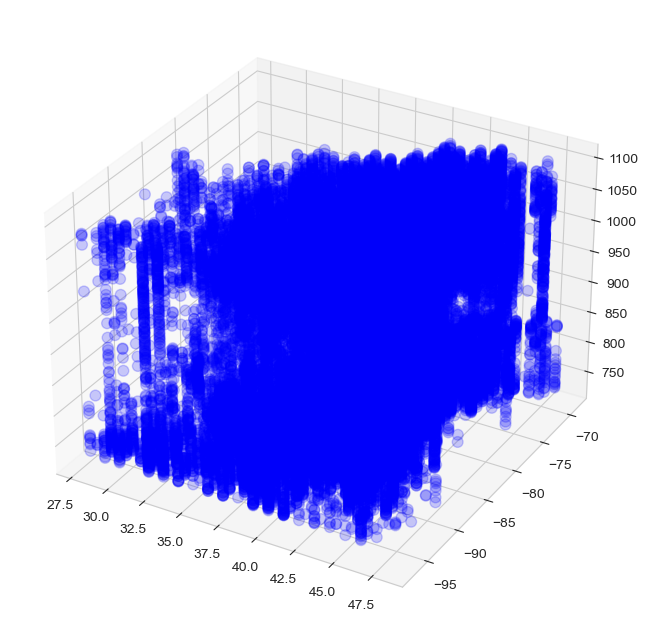

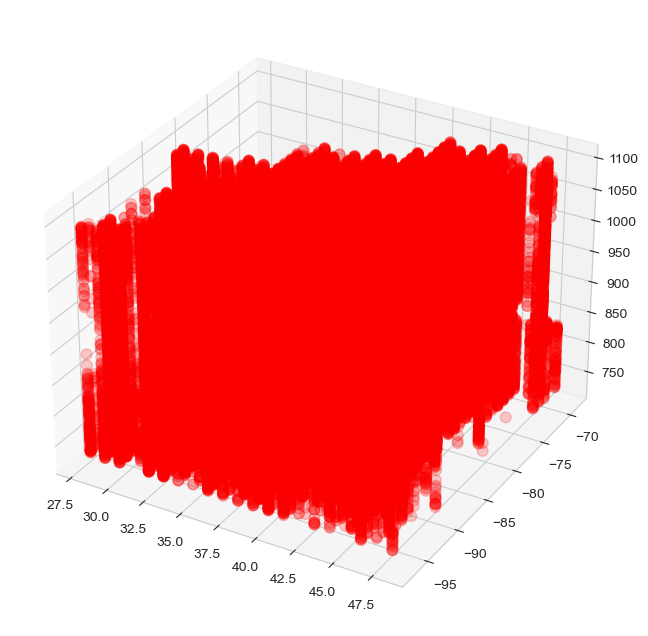

In [7]:
## Plotting the training data
## sepal_width against sepal_length
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(projection='3d')

fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(projection='3d')


ax1.scatter(spec_train.loc[spec_train['ABOVE AVG']==1].LATITUDE,
            spec_train.loc[spec_train['ABOVE AVG']==1].LONGITUDE,
            spec_train.loc[spec_train['ABOVE AVG']==1].ds,
            c='blue',
            alpha = 0.2,
            s=60,
            label="0")


ax2.scatter(spec_train.loc[spec_train['ABOVE AVG']==0].LATITUDE,
            spec_train.loc[spec_train['ABOVE AVG']==0].LONGITUDE,
            spec_train.loc[spec_train['ABOVE AVG']==0].ds,
            c='red',
            alpha = 0.2,
            s=60,
            label="0")



#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
#plt.xlabel("Sepal Width", fontsize=12)
#plt.ylabel("Sepal Length", fontsize=12)
#plt.legend(fontsize=12)

plt.show()

In [8]:
features = ['LATITUDE', 
            'LONGITUDE', 
            'SPECIES',  
            'DURATION MINUTES', 
            'PRCP',
            'SNOW',
            'SNWD',
            'TMAX',
            'TMIN',
            'ds']


knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(3))])


knn_pipe.fit(spec_train[features],
           spec_train['ABOVE AVG'])


pred = knn_pipe.predict(spec_test[features])

In [9]:
def accuracy(true, predicted):
    return np.sum(true==predicted)/len(predicted)


print("Accuracy:", accuracy(spec_test['ABOVE AVG'].values, pred))

Accuracy: 0.8636003799873337


In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty=None)

log_reg.fit(spec_train[features],
            spec_train['ABOVE AVG'])

pred = log_reg.predict(spec_test[features])
pred_prob = log_reg.predict_proba(spec_test[features])[:,1]

print("Accuracy:", accuracy(spec_test['ABOVE AVG'].values, pred))

print("the mL1e is", np.sum(np.absolute(spec_test['ABOVE AVG'].values-pred_prob))/len(spec_test.index))

Accuracy: 0.8546706776440786
the mL1e is 0.22737662387625962


C:\Users\corpt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
